<a href="https://colab.research.google.com/github/sriram15-git/fingerprint_detection/blob/main/fingerprint_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

In [ ]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')

    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))

    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1

    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4

    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

In [ ]:
!kaggle datasets download ruizgara/socofing

Dataset URL: https://www.kaggle.com/datasets/ruizgara/socofing
License(s): other
100% 835M/838M [00:27<00:00, 29.9MB/s]
100% 838M/838M [00:28<00:00, 31.3MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/socofing.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


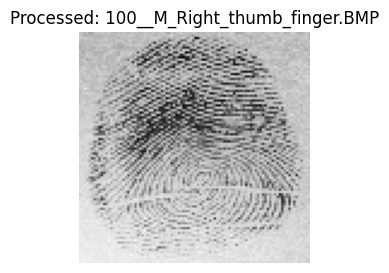

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def preprocess_and_save(img_path, subject_id, gender, lr, finger, output_dir='/content/SOCOFing/Real'):
    """
    Preprocess the fingerprint image minimally to preserve fine details.

    Parameters:
    - img_path: Path to the fingerprint image.
    - subject_id: Identifier for the subject (e.g., '96').
    - gender: 'M' for Male, 'F' for Female.
    - lr: 'Left' or 'Right' for hand orientation.
    - finger: Finger name (e.g., 'thumb', 'index', etc.).
    - output_dir: Directory to save the preprocessed image.
    """
    # Read the fingerprint image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Unable to load image at {img_path}")
        return

    # Resize directly to 96x96 to standardize dimensions
    img_resized = cv2.resize(img, (96, 96), interpolation=cv2.INTER_LINEAR)

    # Light contrast enhancement (optional)
    img_enhanced = cv2.normalize(img_resized, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Save the output image
    os.makedirs(output_dir, exist_ok=True)
    filename = f"{subject_id}__{gender}_{lr}_{finger}_finger.BMP"
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, img_enhanced)

    # Display the image
    plt.figure(figsize=(3, 3))
    plt.title(f"Processed: {filename}")
    plt.imshow(img_enhanced, cmap='gray')
    plt.axis('off')
    plt.show()

    print(f"Image saved at {output_path}")

# Example usage
image_path = "/content/sriram.jpg"  # Use the uploaded image path
subject_id = "100"
gender = "M"  # 'M' for Male, 'F' for Female
lr = "Right"  # 'Left' or 'Right'
finger = "thumb"  # 'thumb', 'index', 'middle', 'ring', 'little'

preprocess_and_save(image_path, subject_id, gender, lr, finger)


Image saved at /content/SOCOFing/Real/100__M_Right_thumb_finger.BMP


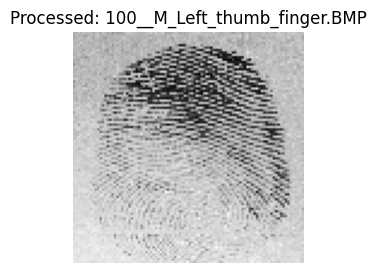

Image saved at /content/SOCOFing/Real/100__M_Left_thumb_finger.BMP


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def preprocess_and_save(img_path, subject_id, gender, lr, finger, output_dir='/content/SOCOFing/Real'):
    """
    Preprocess the fingerprint image minimally to preserve fine details.

    Parameters:
    - img_path: Path to the fingerprint image.
    - subject_id: Identifier for the subject (e.g., '96').
    - gender: 'M' for Male, 'F' for Female.
    - lr: 'Left' or 'Right' for hand orientation.
    - finger: Finger name (e.g., 'thumb', 'index', etc.).
    - output_dir: Directory to save the preprocessed image.
    """
    # Read the fingerprint image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Unable to load image at {img_path}")
        return

    # Resize directly to 96x96 to standardize dimensions
    img_resized = cv2.resize(img, (96, 96), interpolation=cv2.INTER_LINEAR)

    # Light contrast enhancement (optional)
    img_enhanced = cv2.normalize(img_resized, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Save the output image
    os.makedirs(output_dir, exist_ok=True)
    filename = f"{subject_id}__{gender}_{lr}_{finger}_finger.BMP"
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, img_enhanced)

    # Display the image
    plt.figure(figsize=(3, 3))
    plt.title(f"Processed: {filename}")
    plt.imshow(img_enhanced, cmap='gray')
    plt.axis('off')
    plt.show()

    print(f"Image saved at {output_path}")

# Example usage
image_path = "/content/arun.jpg"  # Use the uploaded image path
subject_id = "100"
gender = "M"  # 'M' for Male, 'F' for Female
lr = "Left"  # 'Left' or 'Right'
finger = "thumb"  # 'thumb', 'index', 'middle', 'ring', 'little'

preprocess_and_save(image_path, subject_id, gender, lr, finger)


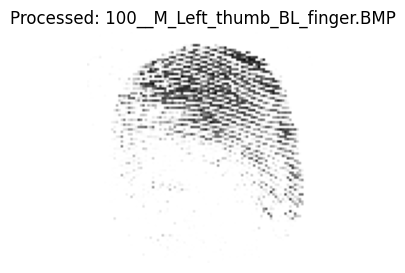

Image saved at /content/SOCOFing/Altered/Altered-Easy/100__M_Left_thumb_BL_finger.BMP


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def preprocess_and_save(img_path, subject_id, gender, lr, finger, output_dir='/content/SOCOFing/Altered/Altered-Easy'):
    """
    Preprocess the fingerprint image minimally to preserve fine details.

    Parameters:
    - img_path: Path to the fingerprint image.
    - subject_id: Identifier for the subject (e.g., '96').
    - gender: 'M' for Male, 'F' for Female.
    - lr: 'Left' or 'Right' for hand orientation.
    - finger: Finger name (e.g., 'thumb', 'index', etc.).
    - output_dir: Directory to save the preprocessed image.
    """
    # Read the fingerprint image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Unable to load image at {img_path}")
        return

    # Resize directly to 96x96 to standardize dimensions
    img_resized = cv2.resize(img, (96, 96), interpolation=cv2.INTER_LINEAR)

    # Light contrast enhancement (optional)
    img_enhanced = cv2.normalize(img_resized, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Save the output image
    os.makedirs(output_dir, exist_ok=True)
    filename = f"{subject_id}__{gender}_{lr}_{finger}_BL_finger.BMP"
    output_path = os.path.join(output_dir, filename)
    cv2.imwrite(output_path, img_enhanced)

    # Display the image
    plt.figure(figsize=(3, 3))
    plt.title(f"Processed: {filename}")
    plt.imshow(img_enhanced, cmap='gray')
    plt.axis('off')
    plt.show()

    print(f"Image saved at {output_path}")

# Example usage
image_path = "/content/arun ill.jpg"  # Use the uploaded image path
subject_id = "100"
gender = "M"  # 'M' for Male, 'F' for Female
lr = "Left"  # 'Left' or 'Right'
finger = "thumb"  # 'thumb', 'index', 'middle', 'ring', 'little'

preprocess_and_save(image_path, subject_id, gender, lr, finger)


Number of images found: 17932


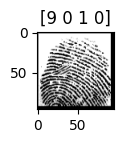

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob



# Case-insensitive glob pattern for .BMP files
img_list = sorted(glob.glob('/content/SOCOFing/Altered/Altered-Easy/*.[bB][mM][pP]'))  # Matches .bmp or .BMP
print(f"Number of images found: {len(img_list)}")

if len(img_list) == 0:
    print("No images found in the specified directory. Please check the path and file extensions.")
else:
    # Initialize arrays
    imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)
    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (96, 96))
            img = img[:, :, np.newaxis]
            imgs[i] = img
            labels[i] = extract_label2(img_path)
        else:
            print(f"Failed to load image: {img_path}")

    # Save the numpy arrays
    os.makedirs('dataset', exist_ok=True)  # Ensure the 'dataset' directory exists
    np.savez('dataset/x_easy.npz', imgs=imgs)
    np.save('dataset/y_easy.npy', labels)

    # Display the last image and its label
    plt.figure(figsize=(1, 1))
    plt.title(labels[-1])
    plt.imshow(imgs[-1], cmap='gray')
    plt.show()



Number of images found: 6000


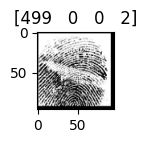

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get all BMP files (case-insensitive)
img_list = [os.path.join('/content/SOCOFing/Real', f) for f in os.listdir('/content/SOCOFing/Real') if f.lower().endswith('.bmp')]
print(f"Number of images found: {len(img_list)}")

if len(img_list) == 0:
    print("No images found in the specified directory. Please check the path and file extensions.")
else:
    imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)

    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = cv2.resize(img, (96, 96))
            img = img[:, :, np.newaxis]
            imgs[i] = img
            labels[i] = extract_label(img_path)
        else:
            print(f"Failed to load image: {img_path}")

    # Save the numpy arrays
    os.makedirs('dataset', exist_ok=True)
    #np.save('dataset/x_real.npz', imgs)
    np.savez('dataset/x_real.npz', imgs=imgs)
    np.save('dataset/y_real.npy', labels)

    # Display the last image and its label
    plt.figure(figsize=(1, 1))
    plt.title(labels[-1])
    plt.imshow(imgs[-1], cmap='gray')
    plt.show()



Number of images found: 14272


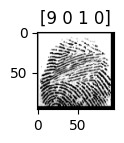

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob



# Case-insensitive glob pattern for .BMP files
img_list = sorted(glob.glob('/content/SOCOFing/Altered/Altered-Hard/*.[bB][mM][pP]'))  # Matches .bmp or .BMP
print(f"Number of images found: {len(img_list)}")

if len(img_list) == 0:
    print("No images found in the specified directory. Please check the path and file extensions.")
else:
    # Initialize arrays
    imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)
    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (96, 96))
            img = img[:, :, np.newaxis]
            imgs[i] = img
            labels[i] = extract_label2(img_path)
        else:
            print(f"Failed to load image: {img_path}")

    # Save the numpy arrays
    os.makedirs('dataset', exist_ok=True)  # Ensure the 'dataset' directory exists
    np.savez('dataset/x_hard.npz', imgs=imgs)
    np.save('dataset/y_hard.npy', labels)

    # Display the last image and its label
    plt.figure(figsize=(1, 1))
    plt.title(labels[-1])
    plt.imshow(imgs[-1], cmap='gray')
    plt.show()



Number of images found: 17067


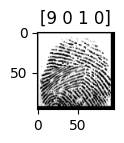

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob



# Case-insensitive glob pattern for .BMP files
img_list = sorted(glob.glob('/content/SOCOFing/Altered/Altered-Medium/*.[bB][mM][pP]'))  # Matches .bmp or .BMP
print(f"Number of images found: {len(img_list)}")

if len(img_list) == 0:
    print("No images found in the specified directory. Please check the path and file extensions.")
else:
    # Initialize arrays
    imgs = np.empty((len(img_list), 96, 96, 1), dtype=np.uint8)
    labels = np.empty((len(img_list), 4), dtype=np.uint16)
    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (96, 96))
            img = img[:, :, np.newaxis]
            imgs[i] = img
            labels[i] = extract_label2(img_path)
        else:
            print(f"Failed to load image: {img_path}")

    # Save the numpy arrays
    os.makedirs('dataset', exist_ok=True)  # Ensure the 'dataset' directory exists
    np.savez('dataset/x_medium.npz', imgs=imgs)
    np.save('dataset/y_medium.npy', labels)

    # Display the last image and its label
    plt.figure(figsize=(1, 1))
    plt.title(labels[-1])
    plt.imshow(imgs[-1], cmap='gray')
    plt.show()



# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import random

(6000, 96, 96, 1) (6000, 4)


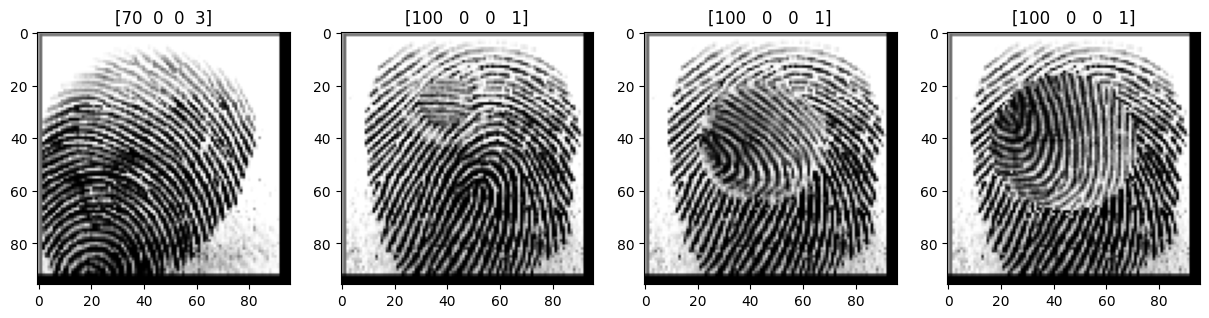

In [ ]:
x_real = np.load('/content/dataset/x_real.npz')['imgs']
y_real = np.load('dataset/y_real.npy')
x_easy = np.load('/content/dataset/x_easy.npz')['imgs']
y_easy = np.load('dataset/y_easy.npy')
x_medium = np.load('/content/dataset/x_medium.npz')['imgs']
y_medium = np.load('dataset/y_medium.npy')
x_hard = np.load('/content/dataset/x_hard.npz')['imgs']
y_hard = np.load('dataset/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)
plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)
plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)
plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')

In [ ]:
x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.1)

print(x_data.shape, label_data.shape)
print(x_train.shape, label_train.shape)
print(x_val.shape, label_val.shape)

(49271, 96, 96, 1) (49271, 4)
(44343, 96, 96, 1) (44343, 4)
(4928, 96, 96, 1) (4928, 4)


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

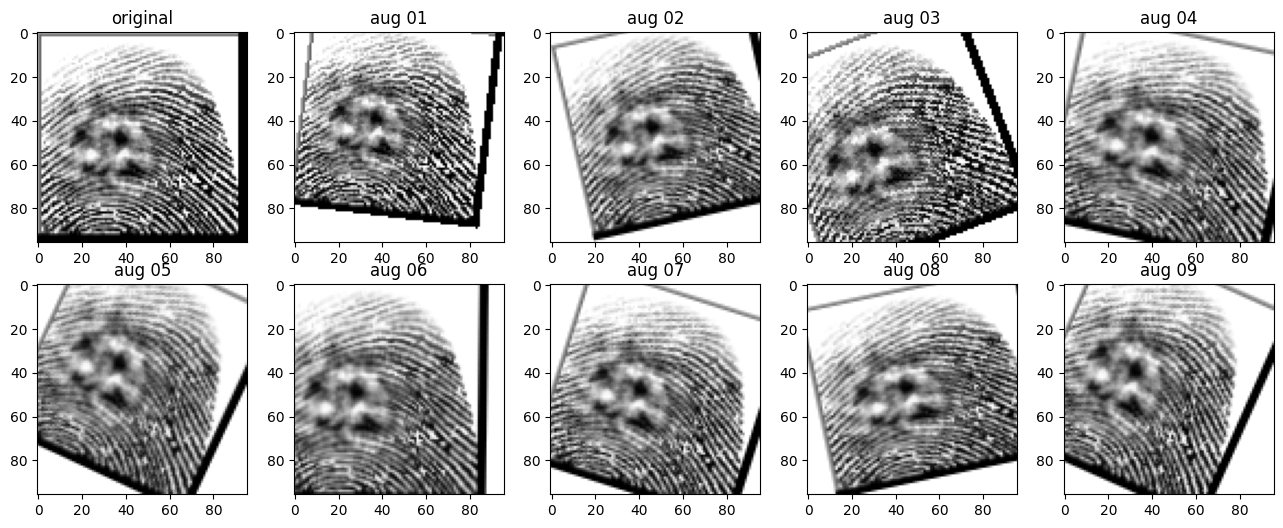

In [ ]:
augs = [x_data[40000]] * 9

seq = iaa.Sequential([
    # blur images with a sigma of 0 to 0.5
    iaa.GaussianBlur(sigma=(0, 0.5)),
    iaa.Affine(
        # scale images to 90-110% of their size, individually per axis
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        # translate by -10 to +10 percent (per axis)
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        # rotate by -30 to +30 degrees
        rotate=(-30, 30),
        # use nearest neighbour or bilinear interpolation (fast)
        order=[0, 1],
        # if mode is constant, use a cval between 0 and 255
        cval=255
    )
], random_order=True)
augs = seq.augment_images(augs)

plt.figure(figsize=(16, 6))
plt.subplot(2, 5, 1)
plt.title('original')
plt.imshow(x_data[40000].squeeze(), cmap='gray')
for i, aug in enumerate(augs):
    plt.subplot(2, 5, i+2)
    plt.title('aug %02d' % int(i+1))
    plt.imshow(aug.squeeze(), cmap='gray')


In [ ]:
x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.1)

print(x_data.shape, label_data.shape)
print(x_train.shape, label_train.shape)
print(x_val.shape, label_val.shape)


(49271, 96, 96, 1) (49271, 4)
(44343, 96, 96, 1) (44343, 4)
(4928, 96, 96, 1) (4928, 4)


In [ ]:
label_real_dict = {}

for i, y in enumerate(y_real):
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    label_real_dict[key] = i


In [ ]:
from imgaug import augmenters as iaa

class DataGenerator(keras.utils.Sequence):
    def __init__(self, x, label, x_real, label_real_dict, batch_size=32, shuffle=True):
        self.x = x
        self.label = label
        self.x_real = x_real
        self.label_real_dict = label_real_dict
        self.batch_size = batch_size
        self.shuffle = shuffle

        # Augmentation pipeline
        self.augmenter = iaa.Sequential([
            iaa.GaussianBlur(sigma=(0, 0.5)),
            iaa.Affine(
                scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                rotate=(-30, 30),
                order=[0, 1],
                cval=255,
            )
        ], random_order=True)

        self.on_epoch_end()


    def __len__(self):
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        x1_batch = self.x[index * self.batch_size:(index + 1) * self.batch_size]
        label_batch = self.label[index * self.batch_size:(index + 1) * self.batch_size]

        # Apply augmentations to x1_batch
        x1_batch_augmented = self.augmenter.augment_images(x1_batch)

        x2_batch = np.empty((self.batch_size, 96, 96, 1), dtype=np.float32)
        y_batch = np.zeros((self.batch_size, 1), dtype=np.float32)

        for i, l in enumerate(label_batch):
            match_key = ''.join(l.astype(str)).zfill(6)
            if random.random() > 0.5:
                x2_batch[i] = self.x_real[self.label_real_dict[match_key]]
                y_batch[i] = 1.0
            else:
                 while True:
                     unmatch_key, unmatch_idx = random.choice(list(self.label_real_dict.items()))
                     if unmatch_key != match_key:
                         break
                 x2_batch[i] = self.x_real[unmatch_idx]
                 y_batch[i] = 0.0

        # Return augmented x1_batch instead of the original
        return (x1_batch_augmented.astype(np.float32) / 255.0,
                 x2_batch.astype(np.float32) / 255.0), y_batch.astype(np.float32)


    def on_epoch_end(self):
        if self.shuffle:
            self.x, self.label = shuffle(self.x, self.label)



In [ ]:

train_gen = DataGenerator(x_train, label_train, x_real, label_real_dict, batch_size=32, shuffle=True)
for inputs, targets in train_gen:
    print(inputs[0].shape)  # x1_batch will now be augmented
    break

val_gen = DataGenerator(x_val, label_val, x_real, label_real_dict, batch_size=32, shuffle=False)


(32, 96, 96, 1)


In [ ]:
for inputs, targets in train_gen:
    print(f"Input 1 shape: {inputs[0].shape}, dtype: {inputs[0].dtype}")
    print(f"Input 2 shape: {inputs[1].shape}, dtype: {inputs[1].dtype}")
    print(f"Target shape: {targets.shape}, dtype: {targets.dtype}")
    break


Input 1 shape: (32, 96, 96, 1), dtype: float32
Input 2 shape: (32, 96, 96, 1), dtype: float32
Target shape: (32, 1), dtype: float32


In [ ]:
x1 = layers.Input(shape=(96, 96, 1))
x2 = layers.Input(shape=(96, 96, 1))

# share weights both inputs
inputs = layers.Input(shape=(96, 96, 1))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = Model(inputs=inputs, outputs=feature)

# 2 feature models that sharing weights
x1_net = feature_model(x1)
x2_net = feature_model(x2)

# subtract features
net = layers.Subtract()([x1_net, x2_net])

# ADDITIONAL LAYER
net = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(net)

# Continue with the existing layers
net = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(net)
net = layers.MaxPooling2D(pool_size=2)(net)

net = layers.Flatten()(net)

net = layers.Dense(64, activation='relu')(net)

net = layers.Dense(1, activation='sigmoid')(net)

model = Model(inputs=[x1, x2], outputs=net)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 96, 96, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 24, 24, 32)     │          9,568 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ subtract (Subtract)       │ (None, 24, 24, 32)     │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 24, 24, 64)     │         18,496 │ subtract[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 24, 24, 32)     │         18,464 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 12, 12, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 4608)           │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │        294,976 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 341,569 (1.30 MB)

 Trainable params: 341,569 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_gen, epochs=5, validation_data=val_gen)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1385/1385 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - acc: 0.8797 - loss: 0.2710 - val_acc: 0.9503 - val_loss: 0.1288
Epoch 2/5
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - acc: 0.9619 - loss: 0.1003 - val_acc: 0.9736 - val_loss: 0.0762
Epoch 3/5
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - acc: 0.9754 - loss: 0.0679 - val_acc: 0.9793 - val_loss: 0.0584
Epoch 4/5
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - acc: 0.9797 - loss: 0.0556 - val_acc: 0.9773 - val_loss: 0.0636
Epoch 5/5
1385/1385 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - acc: 0.9838 - loss: 0.0478 - val_acc: 0.9870 - val_loss: 0.0338


In [ ]:
(x1_sample, x2_sample), y_sample = val_gen[0]  # First batch
y_pred_probs = model.predict([x1_sample, x2_sample])
y_pred = (y_pred_probs > 0.5).astype(int)

print("Ground Truth (y_sample):", y_sample.flatten())
print("Predictions (y_pred):", y_pred.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Ground Truth (y_sample): [1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0.]
Predictions (y_pred): [1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0]


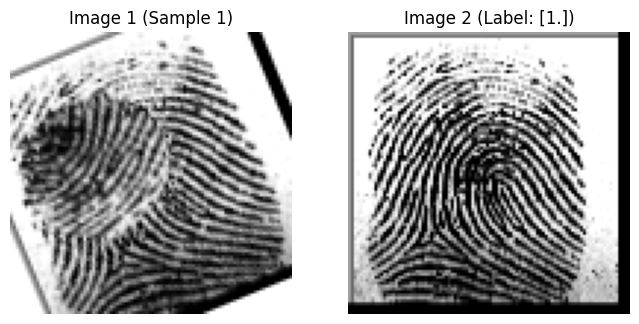

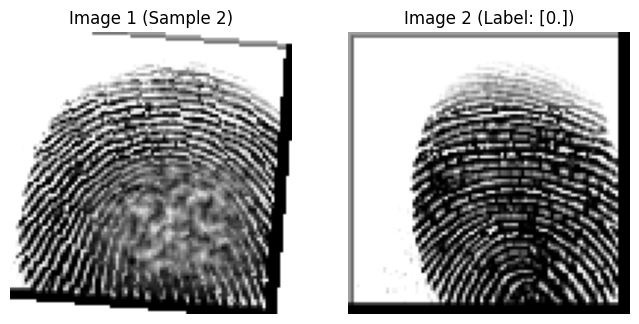

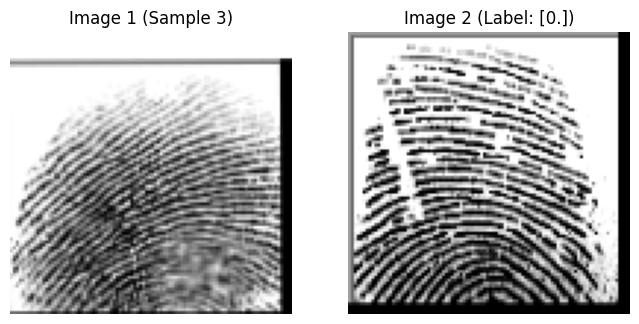

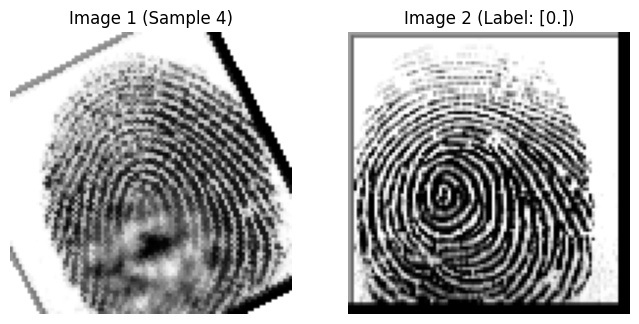

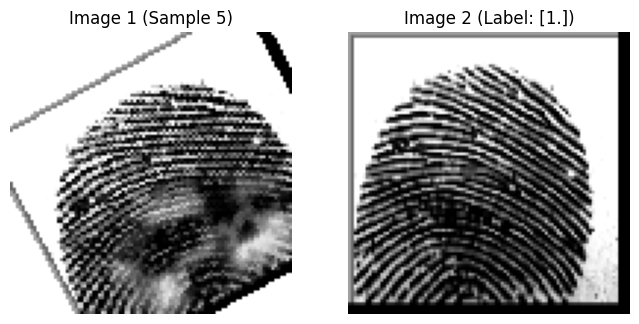

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


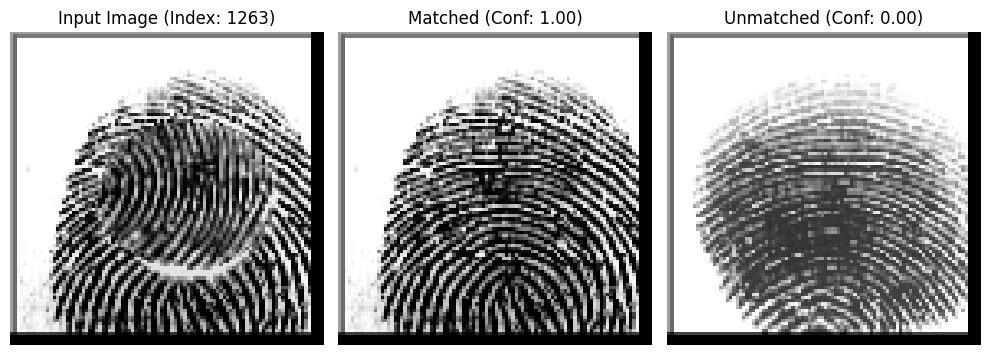

In [ ]:
# Verify labels and corresponding inputs
import matplotlib.pyplot as plt

# Visualize Training Samples
(x1_batch, x2_batch), y_batch = train_gen[0]  # Fetch the first batch

for i in range(5):  # Display first 5 samples
    plt.figure(figsize=(8, 4))

    # Plot the first image (x1_batch)
    plt.subplot(1, 2, 1)
    plt.imshow(x1_batch[i].squeeze(), cmap='gray')
    plt.title(f"Image 1 (Sample {i+1})")
    plt.axis('off')

    # Plot the second image (x2_batch)
    plt.subplot(1, 2, 2)
    plt.imshow(x2_batch[i].squeeze(), cmap='gray')
    plt.title(f"Image 2 (Label: {y_batch[i]})")
    plt.axis('off')

    plt.show()


import random

# Test with random validation samples
for i in range(1):  # Visualize 5 random predictions
    idx = random.randint(0, len(x_val) - 1)
    x1_sample = x_val[idx].reshape(1, 96, 96, 1)
    x2_sample = x_real[label_real_dict[''.join(label_val[idx].astype(str)).zfill(6)]].reshape(1, 96, 96, 1)

    # Prediction for matching pair
    pred_match = model.predict([x1_sample, x2_sample])[0][0]

    # Choose a random unmatched sample
    unmatch_key, unmatch_idx = random.choice(list(label_real_dict.items()))
    x2_unmatched = x_real[unmatch_idx].reshape(1, 96, 96, 1)
    pred_unmatch = model.predict([x1_sample, x2_unmatched])[0][0]

    # Visualize
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.title(f"Input Image (Index: {idx})")
    plt.imshow(x1_sample.squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f"Matched (Conf: {pred_match:.2f})")
    plt.imshow(x2_sample.squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Unmatched (Conf: {pred_unmatch:.2f})")
    plt.imshow(x2_unmatched.squeeze(), cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Confusion Matrix:
[[15  0]
 [ 1 16]]


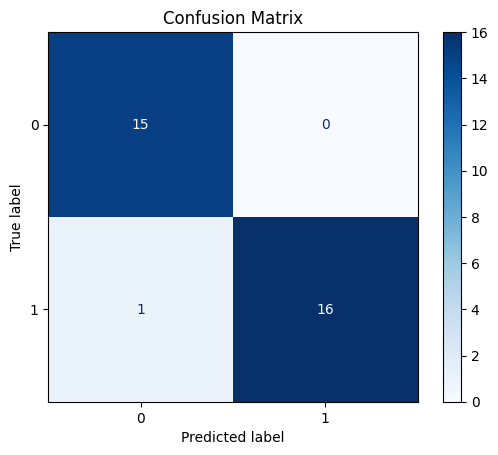

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        15
     Class 1       1.00      0.94      0.97        17

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_sample, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Compute classification report
print("Classification Report:")
print(classification_report(y_sample, y_pred, target_names=["Class 0", "Class 1"]))


In [ ]:
y_pred_probs = []
y_true = []

for i in range(len(val_gen)):
    (x1_batch, x2_batch), y_batch = val_gen[i]  # Fetch the batch
    batch_preds = model.predict([x1_batch, x2_batch], verbose=0)  # Predict for batch
    y_pred_probs.append(batch_preds)  # Collect predictions
    y_true.append(y_batch)  # Collect ground truth

# Flatten the lists into single arrays
y_pred_probs = np.concatenate(y_pred_probs).flatten()
y_true = np.concatenate(y_true).flatten()

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

print("Final y_true Distribution:", np.unique(y_true, return_counts=True))
print("Final y_pred Distribution:", np.unique(y_pred, return_counts=True))


Final y_true Distribution: (array([0., 1.], dtype=float32), array([2451, 2477]))
Final y_pred Distribution: (array([0, 1]), array([2468, 2460]))


Confusion Matrix:
[[2425   26]
 [  43 2434]]


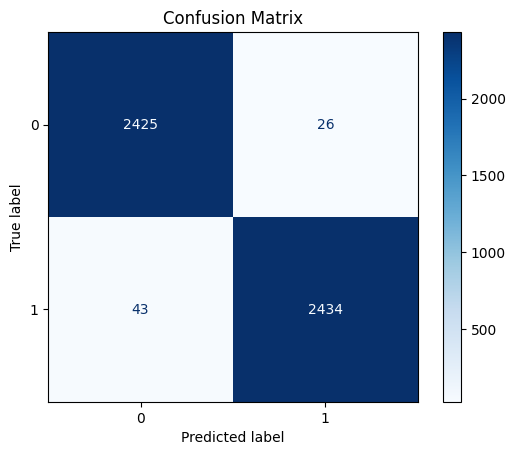

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99      2451
     Class 1       0.99      0.98      0.99      2477

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Compute classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))


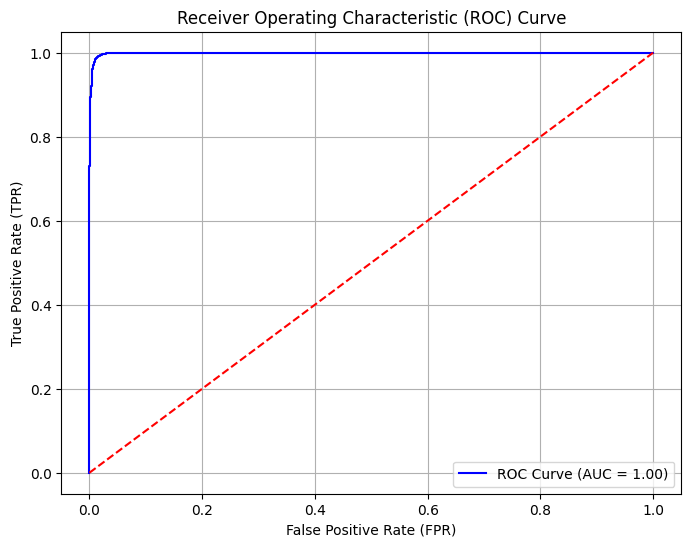

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)  # Calculate AUC score

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random guessing)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# FAR is already computed as 'fpr' in the ROC curve calculation.
# You can use the corresponding threshold to interpret FAR.
# Example: Choose a specific threshold (e.g., 0.5)
threshold = 0.5
far_at_threshold = fpr[np.where(thresholds >= threshold)[0][0]]

print(f"False Acceptance Rate (FAR) at threshold {threshold}: {far_at_threshold:.4f}")


False Acceptance Rate (FAR) at threshold 0.5: 0.0000
